In [4]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import math
from skimage.filters import gaussian
from skimage.util import random_noise
from skimage import exposure
from scipy.signal import medfilt2d,convolve

# Penapis Rerata

In [5]:
# Funtion ini digunakan pada bagian unsharp masking dan high boost
def sharpening_filters(image, kernel, alpha=1):
    if(alpha > 1):
        alpha = alpha-1
        
    lowpass = image_sharpening(us, G, 'same')

    highpass = np.array(us - lowpass)
    highpass = np.clip(highpass,0,1)

    sharp_image = np.array((alpha)*us + highpass)
    sharp_image = np.clip(sharp_image,0,1)

    fig, ax = plt.subplots(2,2,figsize=(10,10))
    ax[0][0].imshow(us, cmap="gray")
    ax[0][1].imshow(lowpass, cmap="gray")
    ax[1][0].imshow(highpass, cmap="gray")
    ax[1][1].imshow(sharp_image, cmap="gray")
    ax[0][0].set_title('Orginal')
    ax[0][1].set_title('LowPass')
    ax[1][0].set_title('HighPass')
    ax[1][1].set_title('Sharp')

In [6]:
# Melakukan menajaman gambar dengan menggunakan konvolusi
def image_sharpening(image,kernel, mode="full"):
        image = np.copy(image)
        if image.max() >1:
            image = image/255
            
        # Mode yang digunakan dalam konvolusi
        if mode=="full":
            if len(image.shape)==2:
                return nd.convolve(image, kernel)
            elif len(image.shape)==3:
                red_channel = np.clip(nd.convolve(image[:,:,0], kernel),0,1)
                green_channel = np.clip(nd.convolve(image[:,:,1], kernel),0,1)
                blue_channel = np.clip(nd.convolve(image[:,:,2], kernel),0,1)
                
                return np.dstack((red_channel,green_channel,blue_channel))
        else:
            if len(image.shape)==2:
                return convolve(image, kernel,mode="{mod}".format(mod=mode))
            elif len(image.shape)==3:
                red_channel = np.clip(convolve(image[:,:,0], kernel,mode="{mod}".format(mod=mode)),0,1)
                green_channel = np.clip(convolve(image[:,:,1], kernel,mode="{mod}".format(mod=mode)),0,1)
                blue_channel = np.clip(convolve(image[:,:,2], kernel, mode="{mod}".format(mod=mode)),0,1)
                return np.dstack((red_channel,green_channel,blue_channel))
            

In [7]:
pepper = imageio.imread('images/peppers512warna.bmp')

# Menerapkan noise pada gambar dengan mode 'salt & pepper dengan jumlah 0,1'
pepper_noise = random_noise(pepper, mode="s&p", amount=0.1)

G = [
     [1/9,1/9,1/9],
     [1/9,1/9,1/9],
     [1/9,1/9,1/9]
    ]

pepper_filter = image_sharpening(pepper_noise,G)

Text(0.5, 1.0, 'Filtered')

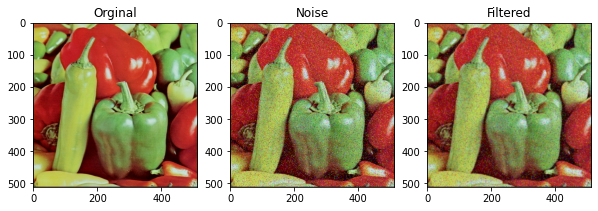

In [8]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(pepper, cmap="gray")
ax[1].imshow(pepper_noise, cmap="gray")
ax[2].imshow(pepper_filter, cmap='gray')
ax[0].set_title('Orginal')
ax[1].set_title('Noise')
ax[2].set_title('Filtered')

# Gaussian Smoothing

In [9]:
gf_image = imageio.imread('images/flower.png')

# Menerapkan gaussian filter dengan nilai sigma tertentu sekaligus tidak mengubah gambar menjadi grayscale
sigma1 = gaussian(gf_image, sigma=1, multichannel=True)
sigma5 = gaussian(gf_image, sigma=5, multichannel=True)
sigma10 = gaussian(gf_image, sigma=10, multichannel=True)
sigma30 = gaussian(gf_image, sigma=30, multichannel=True)

Text(0.5, 1.0, 'sigma=4')

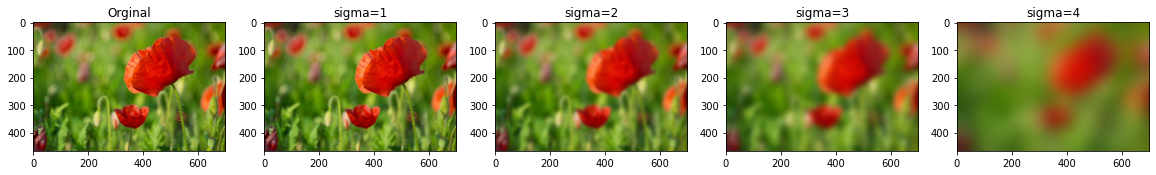

In [10]:
fig, ax = plt.subplots(1,5,figsize=(20,20))
ax[0].imshow(gf_image)
ax[1].imshow(sigma1,)
ax[2].imshow(sigma5)
ax[3].imshow(sigma10)
ax[4].imshow(sigma30)
ax[0].set_title('Orginal')
ax[1].set_title('sigma=1')
ax[2].set_title('sigma=2')
ax[3].set_title('sigma=3')
ax[4].set_title('sigma=4')

# Penapis Nirlanjar Median

In [11]:
median_filter_image = imageio.imread('images/zelda.bmp');


noise_image = random_noise(median_filter_image, mode="s&p", amount=0.1)

noise_image = np.array(255*noise_image, dtype="uint8")

Text(0.5, 1.0, 'Filtered')

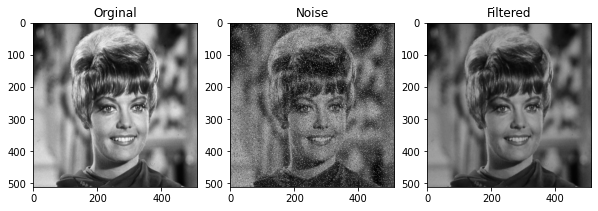

In [12]:
fig, ax = plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(median_filter_image, cmap="gray")
ax[1].imshow(noise_image, cmap="gray")
# Menghasilkan gambar yang melalui penapis nirlanjar median
ax[2].imshow(medfilt2d(noise_image, [3,3]), cmap='gray')
ax[0].set_title('Orginal')
ax[1].set_title('Noise')
ax[2].set_title('Filtered')

# Penapis Lolos-Tinggi

In [13]:
hpf_image = imageio.imread('images/flower.png')

hpf = np.array(hpf_image, dtype=float)

# Kernel
G = np.array([[-1,-1,-1],
             [-1,9,-1], 
             [-1,-1,-1]]) 

# Melakukan proses sharpening
hpf_result = image_sharpening(hpf,G)


Text(0.5, 1.0, 'HighPass')

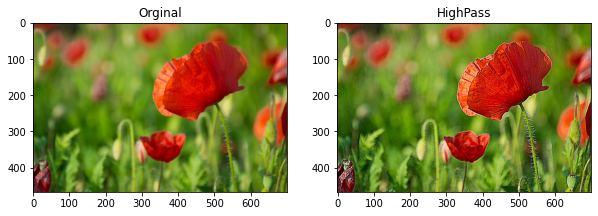

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(hpf/255)
ax[1].imshow(hpf_result)
ax[0].set_title('Orginal')
ax[1].set_title('HighPass')

# Unsharp Masking

In [15]:
# Funtion ini digunakan pada bagian unsharp masking dan high boost
def sharpening_filters(image, kernel, alpha=1):
    if(alpha >= 1):
        
        lowpass = image_sharpening(us, G, 'same')

        highpass = np.array(us - lowpass)
        highpass = np.clip(highpass,0,1)

        sharp_image = np.array(alpha*us + highpass)
        sharp_image = np.clip(sharp_image,0,1)

        fig, ax = plt.subplots(2,2,figsize=(10,10))
        ax[0][0].imshow(us, cmap="gray")
        ax[0][1].imshow(lowpass, cmap="gray")
        ax[1][0].imshow(highpass, cmap="gray")
        ax[1][1].imshow(sharp_image, cmap="gray")
        ax[0][0].set_title('Orginal')
        ax[0][1].set_title('LowPass')
        ax[1][0].set_title('HighPass')
        ax[1][1].set_title('Sharp')
        
    

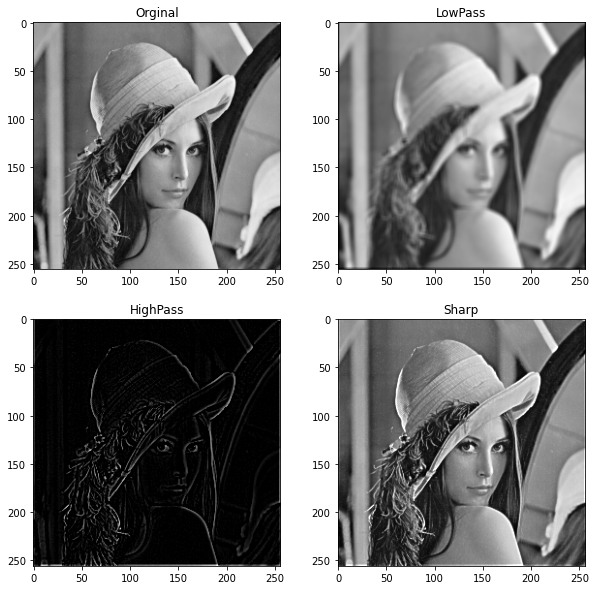

In [16]:
us_image = imageio.imread('images/Lena.bmp', as_gray=True)

# Mengubah tipe gambar menjadi float
us = np.array(us_image, dtype=float)/255

# Menghasilkan kernel penapis rerata dengan nilai 1/25
G = np.zeros((5,5)) + 0.04

# Melakukan Shapening pada gambar
sharpening_filters(us,G)

# High Boost

> $\alpha = 2.4$

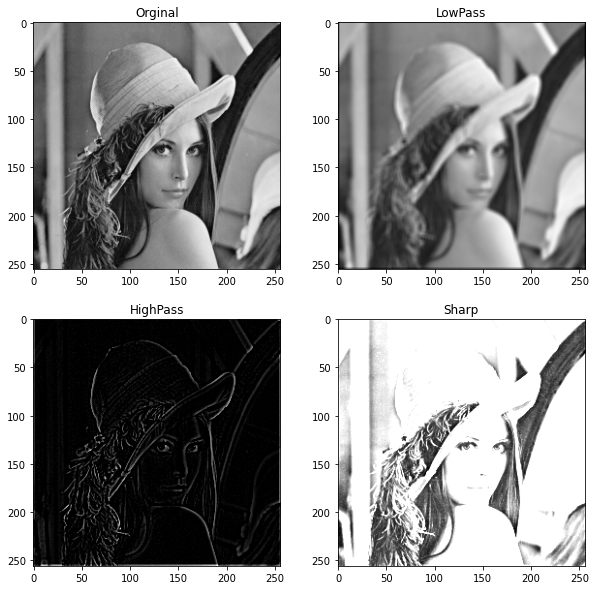

In [17]:
# Nilai alpha
A = 2.4

# Melakukan proses sharpening dengan nilai alpha tertentu
sharpening_filters(us,G,alpha=A)

> $\alpha = 2.9$

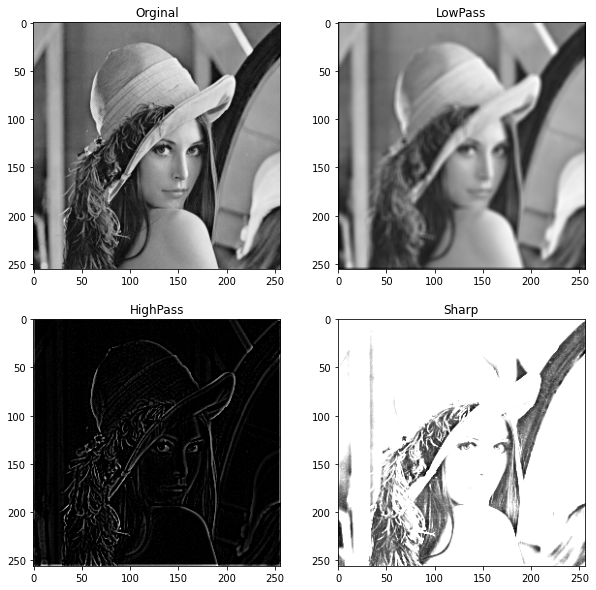

In [18]:
A = 2.9

sharpening_filters(us,G,alpha=A)